In [3]:
conda update -n base -c defaults conda

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2



## Package Plan ##

  environment location: /Users/evanhadd/opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-package-handling-2.2.0|   py39hecd8cb5_0         268 KB
    conda-package-streaming-0.9.0|   py39hecd8cb5_0          28 KB
    conda-repo-cli-1.0.41      |   py39hecd8cb5_0         123 KB
    zstandard-0.19.0           |   py39h6c40b1e_0         452 KB
    ------------------------------------------------------------
                                           Total:         872 KB

The following NEW packages will b

In [4]:
conda install pytorch torchvision -c pytorch

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2



## Package Plan ##

  environment location: /Users/evanhadd/opt/anaconda3

  added / updated specs:
    - pytorch
    - torchvision


The following NEW packages will be INSTALLED:

  ffmpeg             pytorch/osx-64::ffmpeg-4.3-h0a44026_0 
  gnutls             pkgs/main/osx-64::gnutls-3.6.15-hed9c0bf_0 
  lame               pkgs/main/osx-64::lame-3.100-h1de35cc_0 
  libtasn1           pkgs/main/osx-64::libtasn1-4.19.0-h6c40b1e_0 
  nettle             pkgs/main/osx-64::nettle-3.7.3-h230ac6f_1 
  openh264           pkgs/main/osx-64::openh264-2.1.1-h8346a28_0 
  pytorch            pytorch/osx-64::pytorch-2.0.1-py3.9_0 
  torchvision        pytorch/osx-64::torchvision-0.15.2-py39

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import tqdm

In [6]:
# import requests
# file_url = "https://github.com/jgscott/STA380/tree/master/data/EuroSAT_RGB"
# response = requests.get(file_url)
# file_content = response.text

In [13]:

# !git clone 'https://github.com/jgscott/STA380' STA380_clone
# dataset = torchvision.datasets.ImageFolder('STA380/data/EuroSAT_RGB')


Cloning into 'STA380_clone'...
remote: Enumerating objects: 35421, done.
remote: Counting objects: 100% (8396/8396), done.
remote: Compressing objects: 100% (7056/7056), done.
remote: Total 35421 (delta 1255), reused 8342 (delta 1235), pack-reused 27025
Receiving objects: 100% (35421/35421), 346.18 MiB | 6.66 MiB/s, done.
Resolving deltas: 100% (1258/1258), done.
Updating files: 100% (35749/35749), done.


In [35]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder, MNIST
import torch

# Define your dataset transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust the size as needed
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Clone the repository and set the dataset path
!git clone 'https://github.com/jgscott/STA380' STA380_clone
dataset_path = 'STA380_clone/data/EuroSAT_RGB'  # Update this path accordingly

# Load the training dataset using ImageFolder
trainset = ImageFolder(root=dataset_path, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

# Load the MNIST test dataset
testset =  ImageFolder(root=dataset_path, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)


fatal: destination path 'STA380_clone' already exists and is not an empty directory.


TypeError: __init__() got an unexpected keyword argument 'train'

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, stride=1)  # Adjust in_channels to 13 for input channels
        self.conv2 = nn.Conv2d(32, 64, 3, stride=1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(774400, 128)  # Adjust input size based on the output size from the last conv layer
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=774400, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [27]:
# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

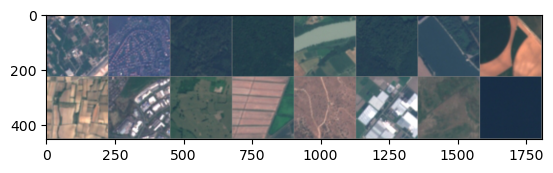

Labels: PermanentCrop Residential Forest Forest River Forest River AnnualCrop PermanentCrop Industrial Pasture AnnualCrop HerbaceousVegetation Industrial HerbaceousVegetation SeaLake


In [32]:
import torchvision
import matplotlib.pyplot as plt

# Assuming you have the trainloader and label_names defined

# Dictionary mapping label values to label names
label_names = {
    0: 'AnnualCrop',
    1: 'Forest',
    2: 'HerbaceousVegetation',
    3: 'Highway',
    4: 'Industrial',
    5: 'Pasture',   
    6: 'PermanentCrop',
    7: 'Residential',
    8: 'River',
    9: 'SeaLake',
    # Add more label mappings as needed
}

# Get a batch of training images and display them
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Use next() to get the next batch

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display the images in a grid
imshow(torchvision.utils.make_grid(images[:16]))

# Print label names corresponding to file names
print('Labels:', ' '.join(label_names[labels[j].item()] for j in range(16)))


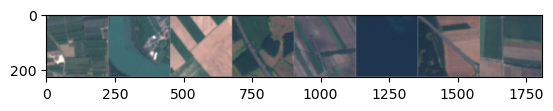

Predicted: Residential Industrial AnnualCrop River HerbaceousVegetation Forest PermanentCrop Residential


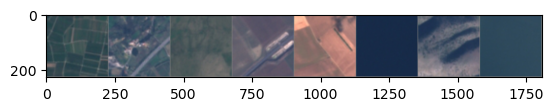

Predicted: Highway Residential HerbaceousVegetation Highway AnnualCrop Forest Residential Forest


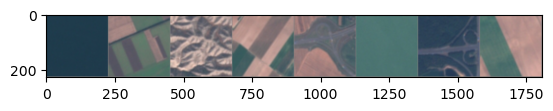

Predicted: Forest AnnualCrop Residential AnnualCrop AnnualCrop SeaLake Forest PermanentCrop


KeyboardInterrupt: 

In [34]:
import torchvision
import torch
import matplotlib.pyplot as plt
import random  # Import the random module

# Assuming you have the trainloader, testloader, label_names, net, criterion, and optimizer defined

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Number of training epochs
num_epochs = 5

# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 20 == 0:
            with torch.no_grad():
                # Create a new iterator for test data in each epoch
                testiter = iter(testloader)
                
                # Randomly select indices for displaying test images
                random_indices = random.sample(range(len(testloader.dataset)), k=8)
                
                # Fetch the corresponding images and labels
                test_images = torch.stack([testloader.dataset[i][0] for i in random_indices])
                test_labels = torch.tensor([testloader.dataset[i][1] for i in random_indices])
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                imshow(torchvision.utils.make_grid(test_images.cpu()))
                test_outputs = net(test_images)
                _, predicted = torch.max(test_outputs, 1)
                print('Predicted:', ' '.join(label_names[predicted[j].item()] for j in range(8)))

    # Print average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1)}")

print('Finished Training')
